# Problem Statement

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

# Step 1:  Reading and Understanding Data

In [1170]:
# Importing Libraries

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score

from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson

In [1171]:
# Warning

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [1172]:
# Display format

pd.set_option('display.max_rows', 150)
pd.set_option('display.max_columns', 150)
pd.options.display.float_format = '{:2f}'.format

### Reading Data

In [1173]:
file_to_read = os.getcwd() + '\day.csv'
df = pd.read_csv(file_to_read)
df.head(5)

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2 14.110847 18.181250 80.583300  10.749882     331         654   
1           2 14.902598 17.686950 69.608700  16.652113     131         670   
2           1  8.050924  9.470250 43.727300  16.636703     120        1229   
3           1  8.200000 10.606100 59.043500  10.739832     108        1454   
4           1  9.305237 11.463500 43.695700  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [1174]:
df.shape

(730, 16)

Total 730 Rows present in original dataset with 16 columns

In [1175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


- Check if dataset has null values

In [1176]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

There are no missing values in the dataset

In [1177]:
df.describe()

instant     season         yr       mnth    holiday    weekday  \
count 730.000000 730.000000 730.000000 730.000000 730.000000 730.000000   
mean  365.500000   2.498630   0.500000   6.526027   0.028767   2.997260   
std   210.877136   1.110184   0.500343   3.450215   0.167266   2.006161   
min     1.000000   1.000000   0.000000   1.000000   0.000000   0.000000   
25%   183.250000   2.000000   0.000000   4.000000   0.000000   1.000000   
50%   365.500000   3.000000   0.500000   7.000000   0.000000   3.000000   
75%   547.750000   3.000000   1.000000  10.000000   0.000000   5.000000   
max   730.000000   4.000000   1.000000  12.000000   1.000000   6.000000   

       workingday  weathersit       temp      atemp        hum  windspeed  \
count  730.000000  730.000000 730.000000 730.000000 730.000000 730.000000   
mean     0.683562    1.394521  20.319259  23.726322  62.765175  12.763620   
std      0.465405    0.544807   7.506729   8.150308  14.237589   5.195841   
min      0.000000    1.000000   2.424346   3.953480   0.000000   1.500244   
25%      0.000000    1.000000  13.811885  16.889713  52.000000   9.041650   
50%      1.000000    1.000000  20.465826  24.368225  62.625000  12.125325   
75%      1.000000    2.000000  26.880615  30.445775  72.989575  15.625589   
max      1.000000    3.000000  35.328347  42.044800  97.250000  34.000021   

           casual  registered         cnt  
count  730.000000  730.000000  730.000000  
mean   849.249315 3658.757534 4508.006849  
std    686.479875 1559.758728 1936.011647  
min      2.000000   20.000000   22.000000  
25%    316.250000 2502.250000 3169.750000  
50%    717.000000 3664.500000 4548.500000  
75%   1096.500000 4783.250000 5966.000000  
max   3410.000000 6946.000000 8714.000000

- Columns instant yr, mean matches exactly with 50% percentile which shows that the values are normally distributed
- Column season, mnth, holiday, weekday, temp, atemp, hum, windspeed, registered and cnt have mean matching approximately with 50%
- Columns workingday mean and 50% has significant different and tells that the column is not normally distributed
- Column Index has count of 730 and max as 730, min as 1. 

### Checking Duplicates in the dataset

In [1178]:
duplicate_rows = df[df.duplicated()]
duplicate_rows

Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []

In [1179]:
df.nunique() # Checking unique value of each column

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

There are no duplicate rows in the dataframe

## Removing unwanted columns
- instant is equivalent to the index and hence can be dropped.
- dteday is the date on which the bike was ridden. We also have year and month column so we can remove dteday
- causal indicates the number casual users who have made a rental
- registered total number of registered users who have made a booking on a given day. 
- cnt variable indicates the total number of bike rental which includes casual and registered. Hence both casual and registred can be dropped. 

In [1180]:
columns_to_drop = ['instant', 'dteday', 'casual', 'registered']

day_df = df.copy()

day_df.drop(columns=columns_to_drop, axis=1, inplace=True)

In [1181]:
day_df.shape

(730, 12)

From 16 columns, we reduced to 12 columns 

#### Categorizing different types of columns

In [1182]:
cat_cols = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

num_cols= ['temp', 'atemp', 'hum', 'windspeed']

target_variable = ['cnt']


### Converting categorical columns to appropiate form

In [1183]:

cleanup_values = {'season' : {1: "spring", 2: "summer", 3: "fall", 4: "winter"},
                  "yr" : {0: 2018, 1: 2019}, 
                   "weathersit": {1: "Clear", 2: "Cloudy", 3: "Light_Rain", 4: "Heavy_Rain"}}

day_df = day_df.replace(cleanup_values)



In [1184]:
# Converting date/time columns to appropiate values

import calendar

day_df['mnth'] = day_df['mnth'].apply(lambda x : calendar.month_abbr[x])
day_df['weekday'] = day_df['weekday'].apply(lambda x : calendar.day_abbr[x])
day_df.head(5)

season    yr mnth  holiday weekday  workingday weathersit      temp  \
0  spring  2018  Jan        0     Sun           0     Cloudy 14.110847   
1  spring  2018  Jan        0     Mon           0     Cloudy 14.902598   
2  spring  2018  Jan        0     Tue           1      Clear  8.050924   
3  spring  2018  Jan        0     Wed           1      Clear  8.200000   
4  spring  2018  Jan        0     Thu           1      Clear  9.305237   

      atemp       hum  windspeed   cnt  
0 18.181250 80.583300  10.749882   985  
1 17.686950 69.608700  16.652113   801  
2  9.470250 43.727300  16.636703  1349  
3 10.606100 59.043500  10.739832  1562  
4 11.463500 43.695700  12.522300  1600

# Step 2: Analysing and Visualising Data  
## Univariate Analysis

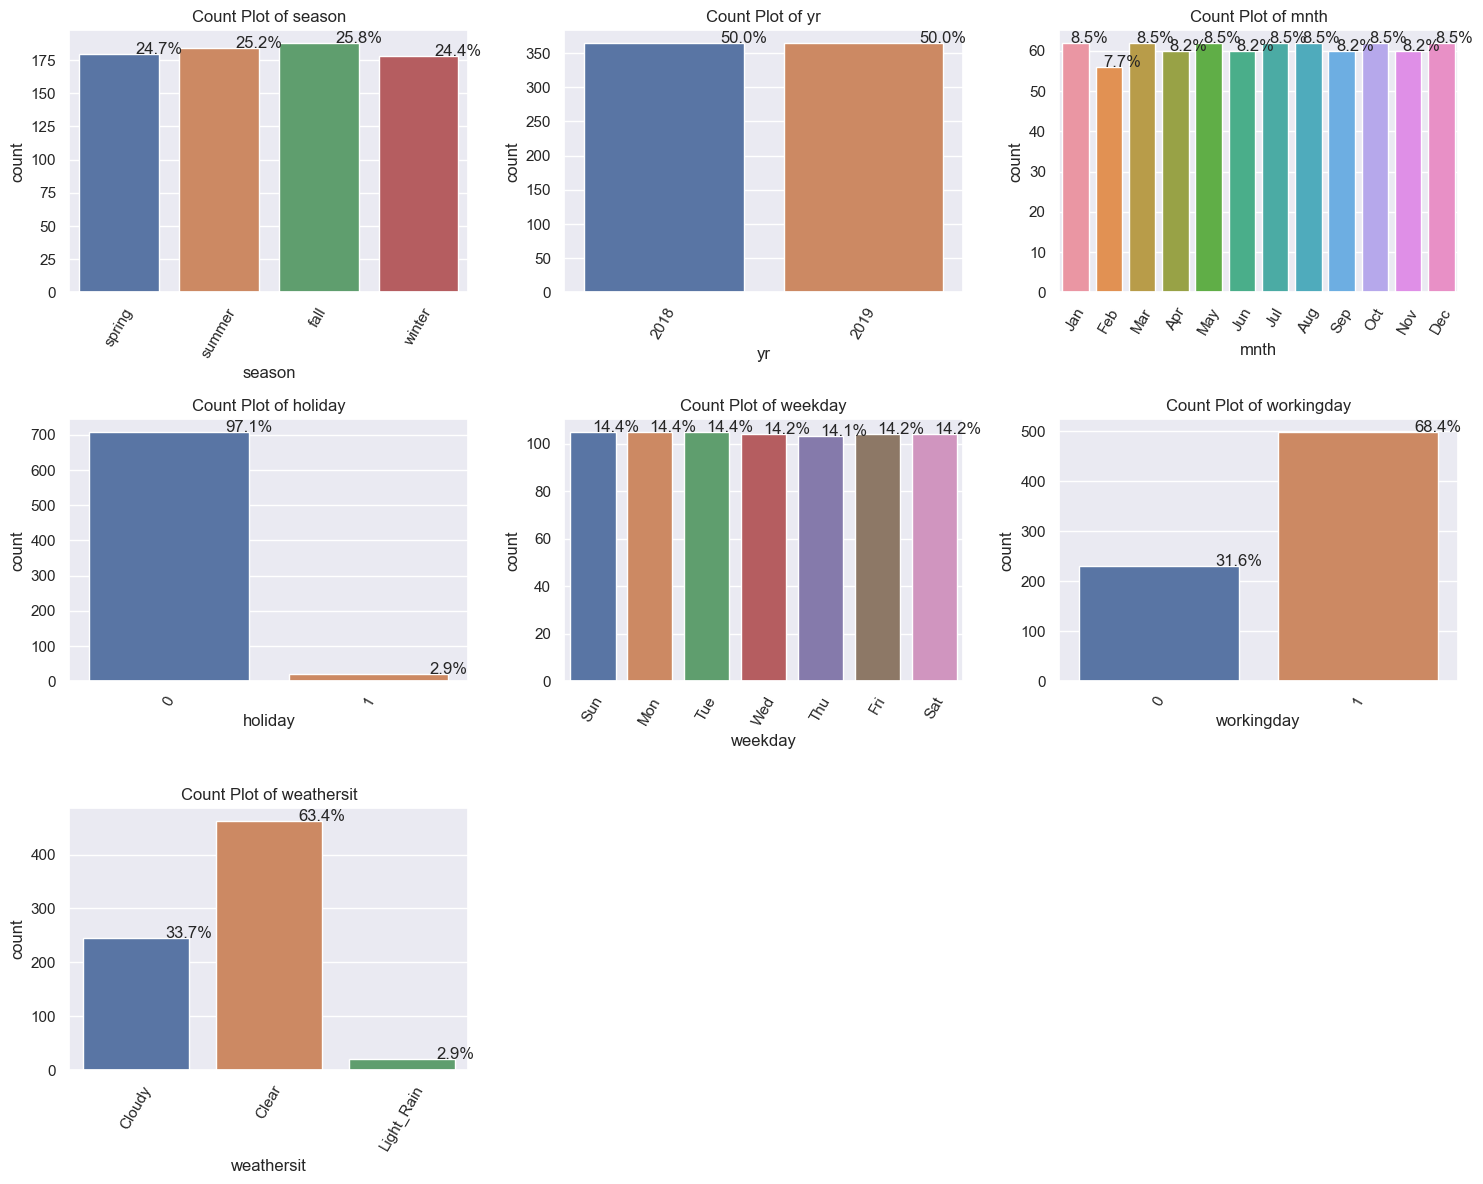

In [1185]:
# Univariate Analysis on Categorical columns

plt.figure(figsize=(15,12))

for i, col in enumerate(cat_cols, 1):
    plt.subplot(3, 3, i)
    ax = sns.countplot(day_df[col])

    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/len(day_df))
        x = p.get_x() + p.get_width()
        y = p.get_height()
        ax.annotate(percentage, (x, y),ha='center')
    plt.title(f'Count Plot of {col}')
    plt.xlabel(col)
    # plt.ylabel('Count of Bike Rentals')
    plt.xticks(rotation=60)

plt.tight_layout()
plt.show()

### Insights:

Season - We can infer even weightage of different seasons with target variable.

Year - Year is also equally distributed with target variables. 50% of data is 2018 and remining 50% of the data is 2019

Month - Different months have approimate equal weightage w.r.t target variable. 

Holiday - Holiday data is not balanced and majority of them is holiday.

Weekday - Data for different days of a week (0 as Sunday and onwards) have equal weightage.

WorkingDay : Data for working day is not balanced and majority of it is a working Day which could also mean that more people rented/used the bike during working day.

Weathersit : Majority of data points are for Clear Weather compared to cloudy and light Rain. Light Rain has lesser presence in the dataset. During clear weather many people could have rented/used the bikes.


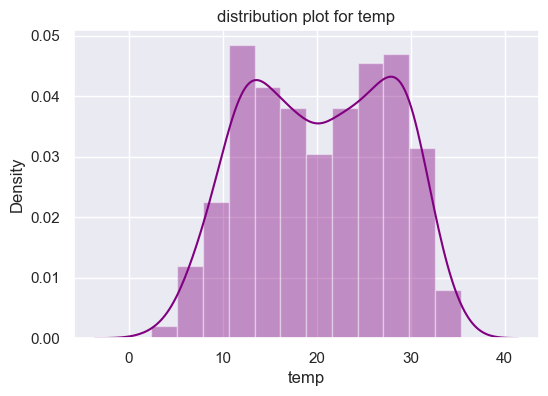

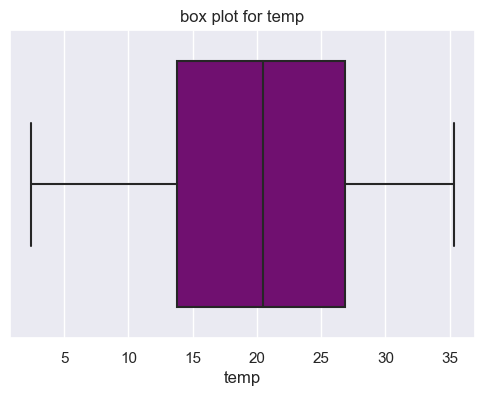

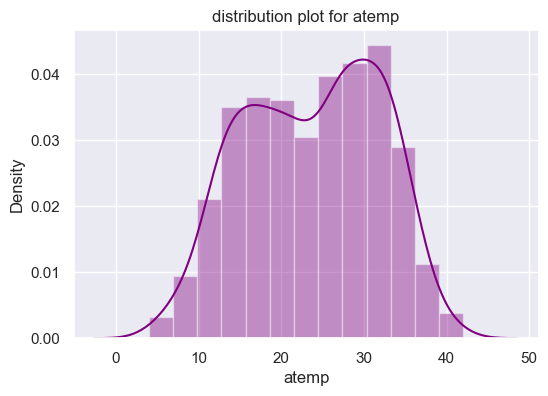

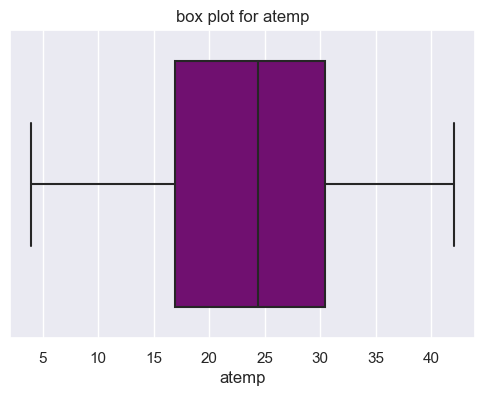

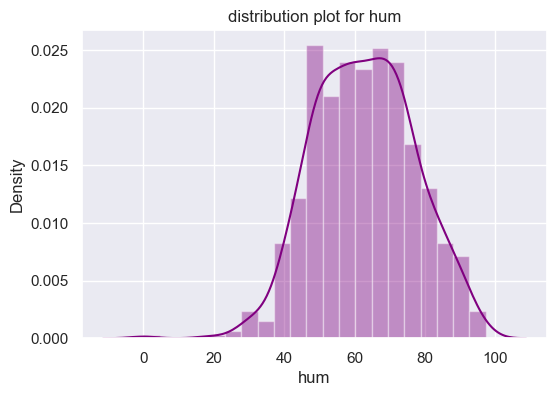

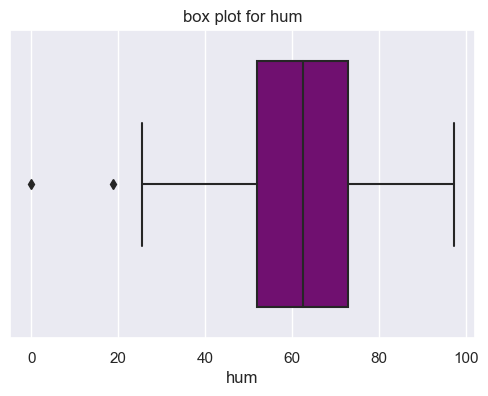

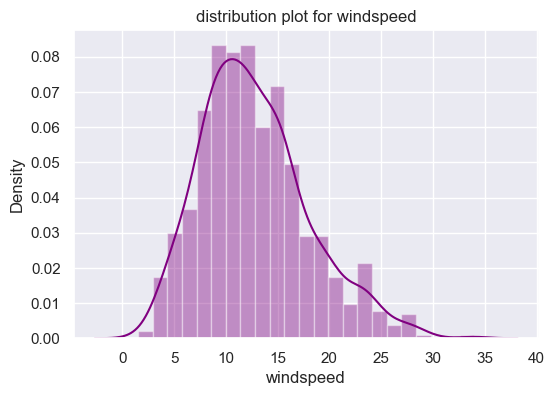

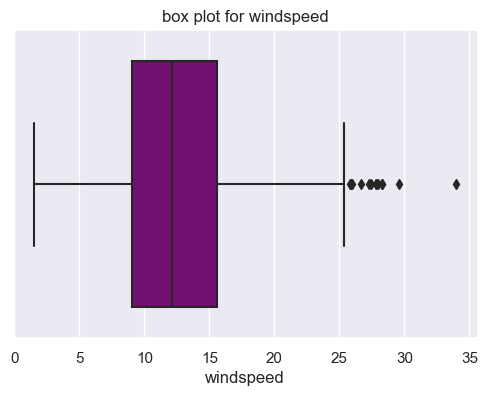

In [1186]:
# Univariate Analysis of numerical columns

sns.set(rc={'figure.figsize':(6,4)})
for i in num_cols:

    sns.distplot(day_df[i], color='purple').set(title=f"distribution plot for {i}")
    plt.show()
    sns.boxplot(day_df[i], color='purple').set(title=f"box plot for {i}")
    plt.show()

### Insights

Distribution for temp and atemp are not exactly normal with median temp approx. 21

Distribution of Humidity column is normally distributed with median value approx. 61

Distribution of Windspeed seems normal distribution with median value approx. 13


## Bivariate  and Multivariate Analysis

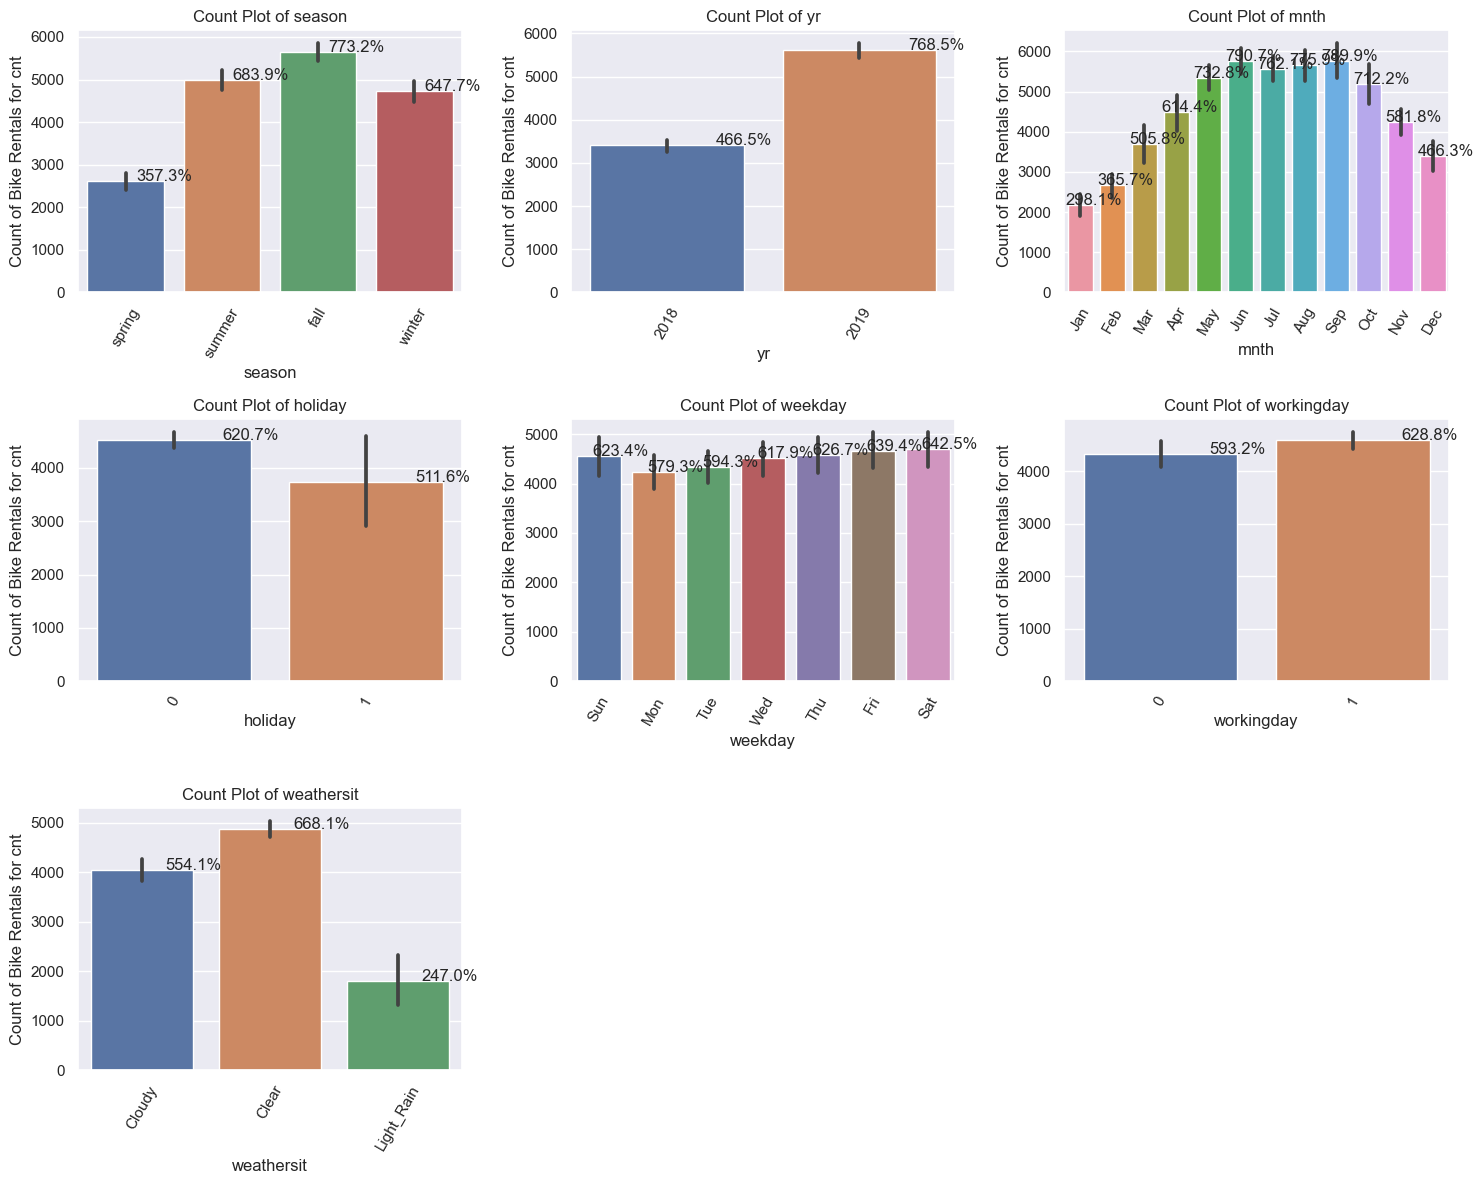

In [1187]:
# Bivariate Analysis on Categorical Columns

plt.figure(figsize=(15,12))

for i, col in enumerate(cat_cols, 1):
    plt.subplot(3, 3, i)
    ax = sns.barplot(x=col, y=target_variable[0], data=day_df)

    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/len(day_df))
        x = p.get_x() + p.get_width()
        y = p.get_height()
        ax.annotate(percentage, (x, y),ha='center')
    
    plt.title(f'Count Plot of {col}')
    plt.xlabel(col)
    plt.ylabel(f'Count of Bike Rentals for {target_variable[0]}')
    plt.xticks(rotation=60)

plt.tight_layout()
plt.show()

### Insights

- Majority of people seems to have rented/used the bikes during fall season followed by summer , winter and spring
- In 2019 majority of people seem to have used /rented bike more compared to previous year. This might also due to the awareness among the people. 
- Majority of people seem to rent/use the bike in June followed by September, August and July. These are the peak periods for the customers.
- More number of people used/rented the bike during holidays.
- Saturday and Friday seems to be the days when people are using bikes more followed by Sunday and other days.
- Not much difference in customers for Working Days
- During clear weather there are many people riding/using the bikes followed by Cloudy. Lesser people are using bikes during light Rain. No one using bikes during Heavy Rain.

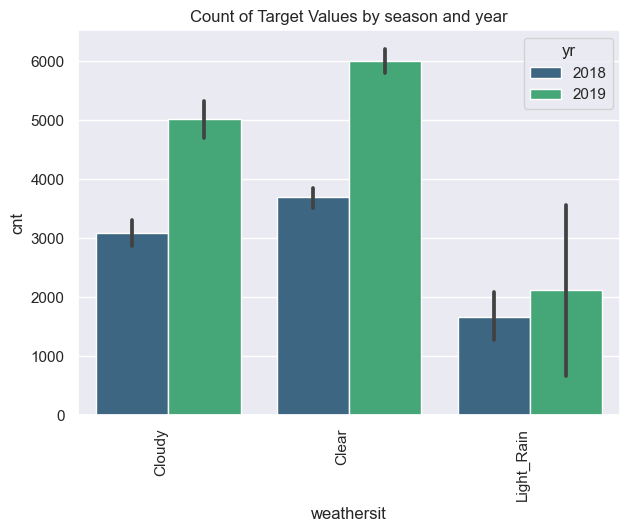

In [1188]:
# Two categorical columns and target variable

plt.figure(figsize=(7,5))
ax = sns.barplot(data =day_df,x='weathersit', y='cnt', hue ='yr',palette='viridis')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.title('Count of Target Values by season and year')
plt.show()

Insights

In 2019, majority of people used /rented biked during Clear weather followed by Cloudy and light Rain. There is a significant increase in customer in 2019 during Clear Weather.

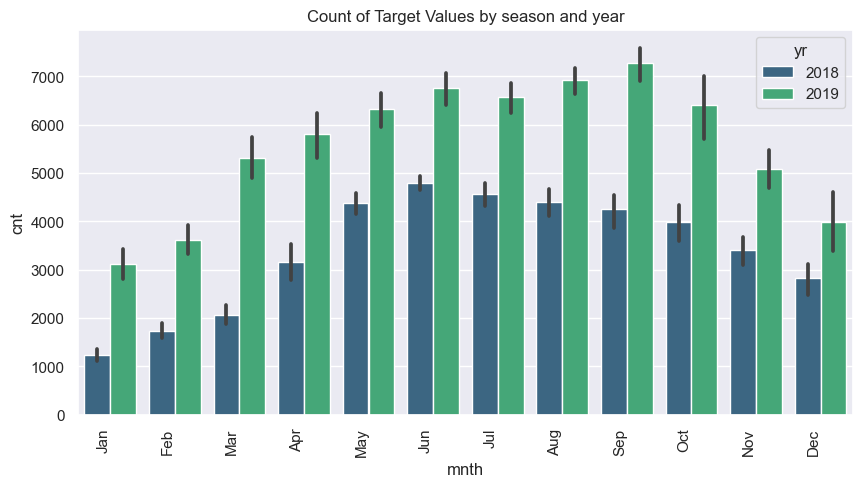

In [1189]:

plt.figure(figsize=(10,5))
ax = sns.barplot(data =day_df,x='mnth', y='cnt', hue ='yr',palette='viridis')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.title('Count of Target Values by season and year')
plt.show()

Insights

Sep and August are the months in 2019, where a significant increase in bikes renting/usage has increased, followed by Jun, July and October

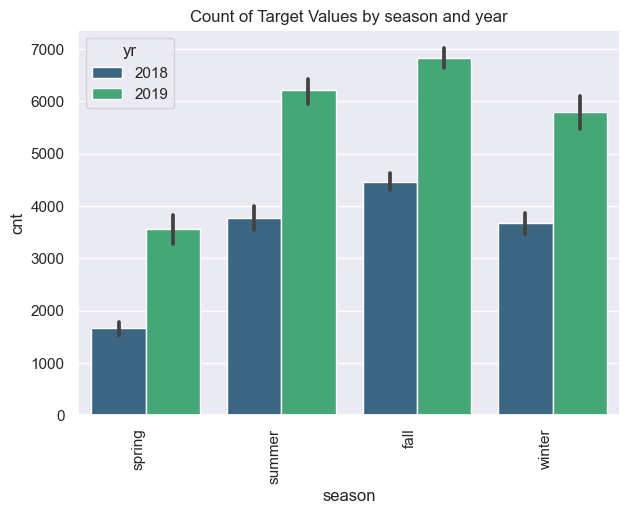

In [1190]:
plt.figure(figsize=(7,5))
ax = sns.barplot(data =day_df,x='season', y='cnt', hue ='yr',palette='viridis')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.title('Count of Target Values by season and year')
plt.show()

Insights

During 2019 fall season, there has been more increase in customers for bike renting compnay, followed by Summer and Winter

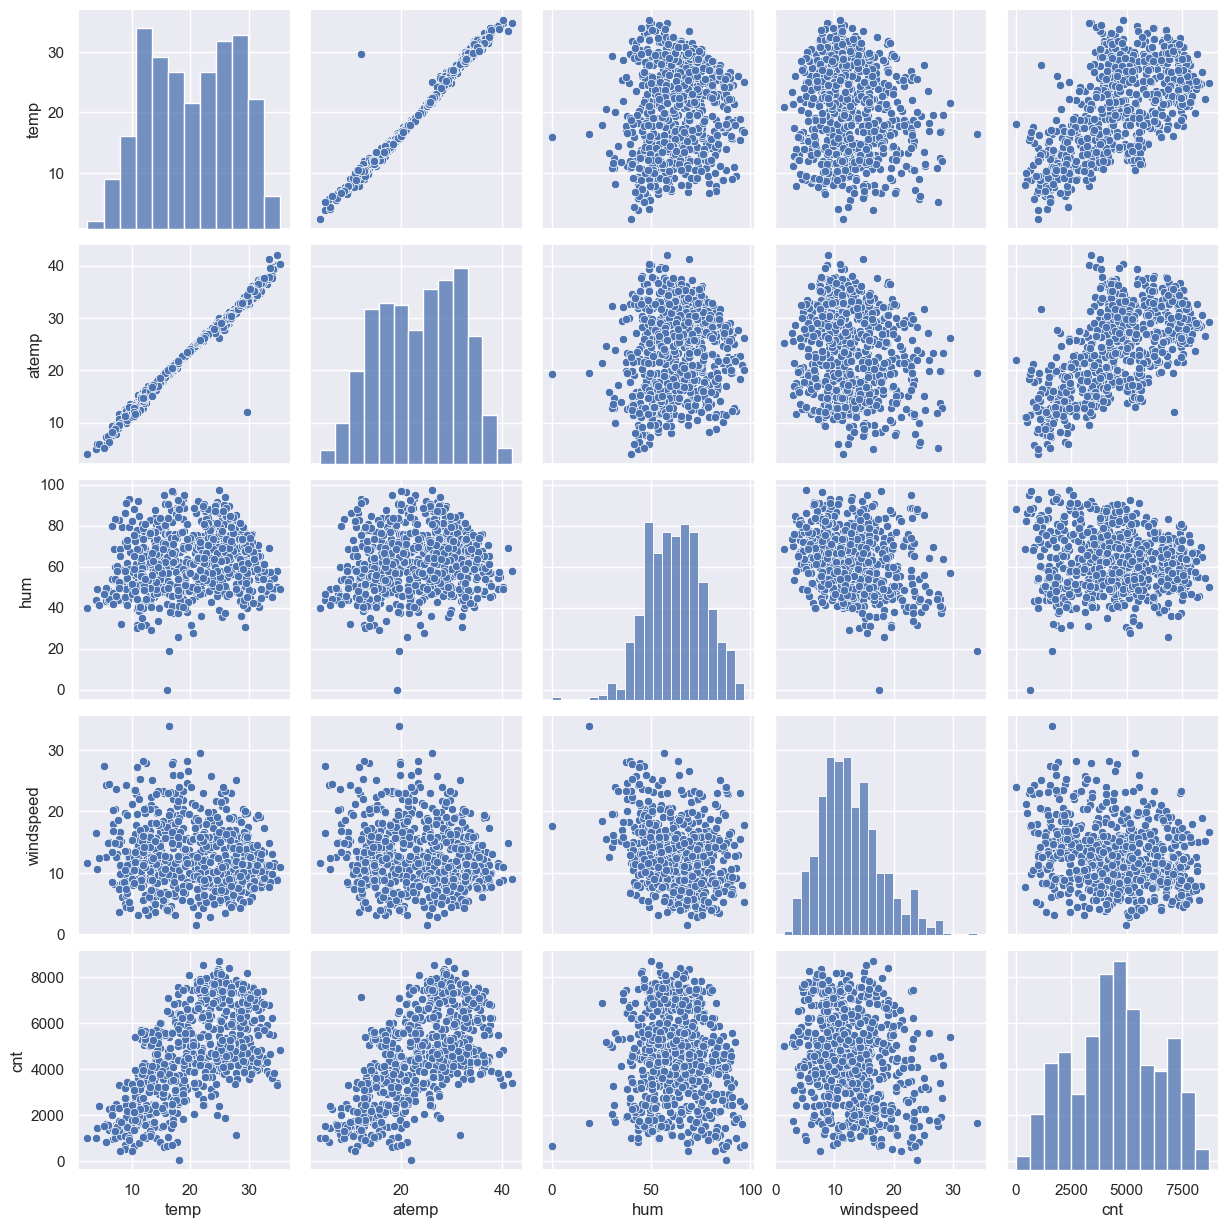

In [1191]:
# Bivariate Analysis on Numerical Columns

variables = num_cols + target_variable
sns.pairplot(day_df, vars=variables)

Insights:

A perfect positive correlation exists between temp and atemp. Also, as the temp increases, count of customers also increases. 

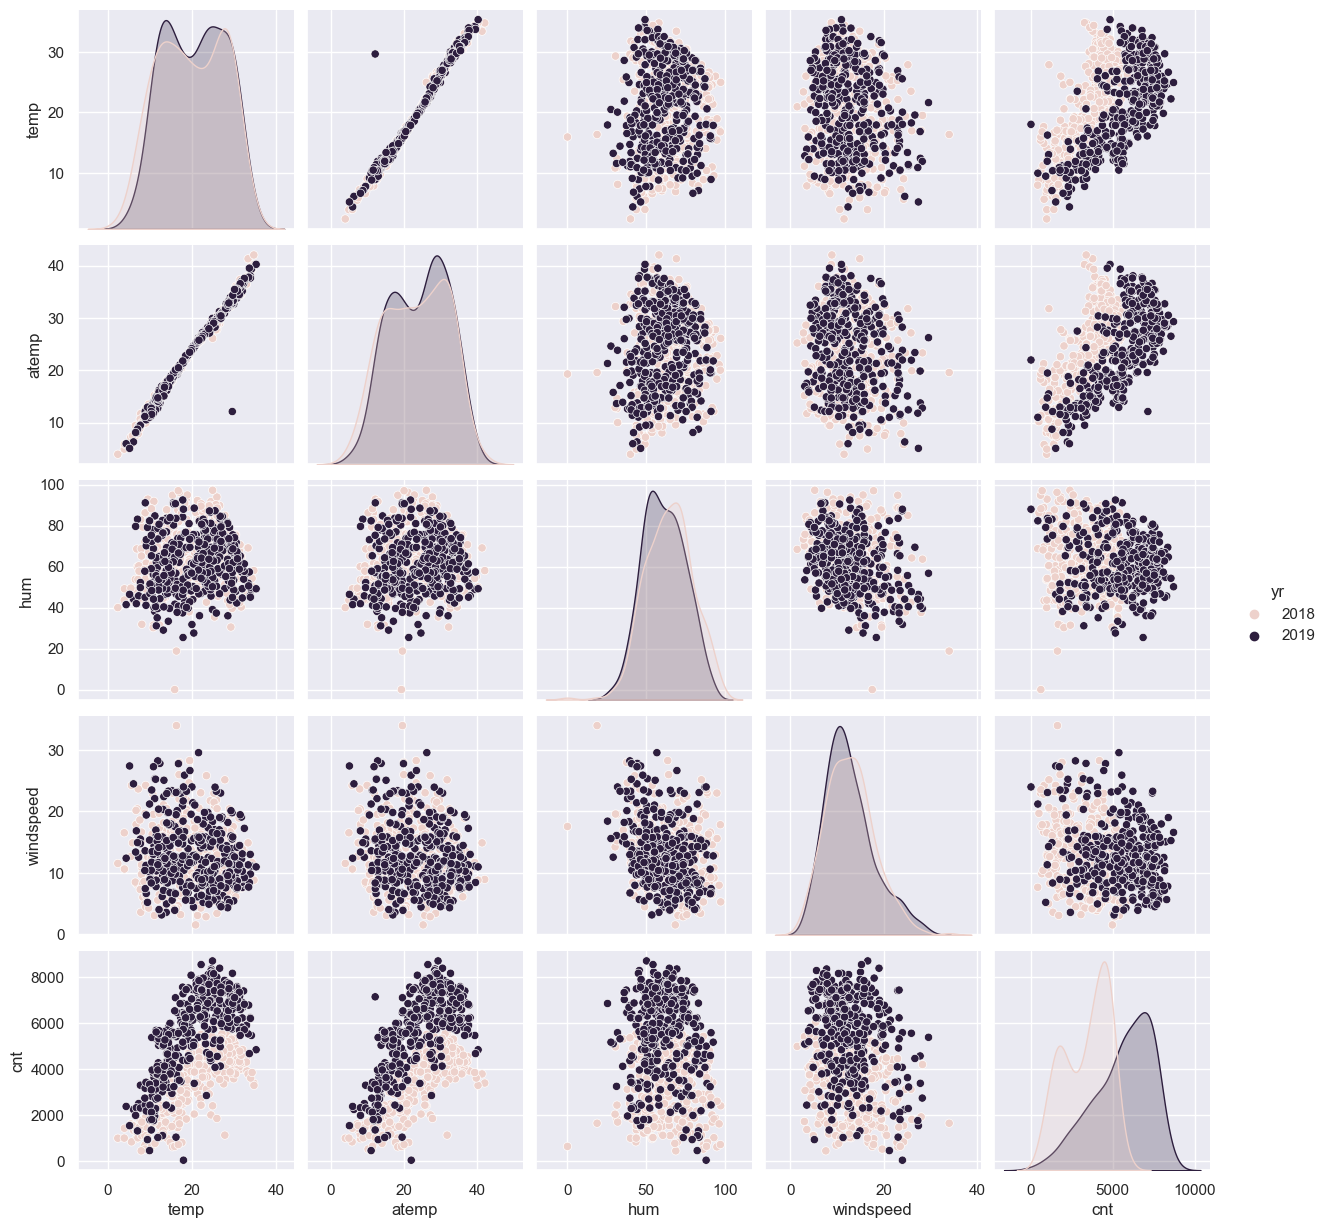

In [1192]:
# Numerical columns with Year Analysis

sns.pairplot(day_df, vars=variables, hue = 'yr')

We see that in 2019, temp and atemp was relatively higher ,  humidity and windspeed has been comparatively lower than pervious year. This could be the reason in increase in number of people rented/ used the bike.

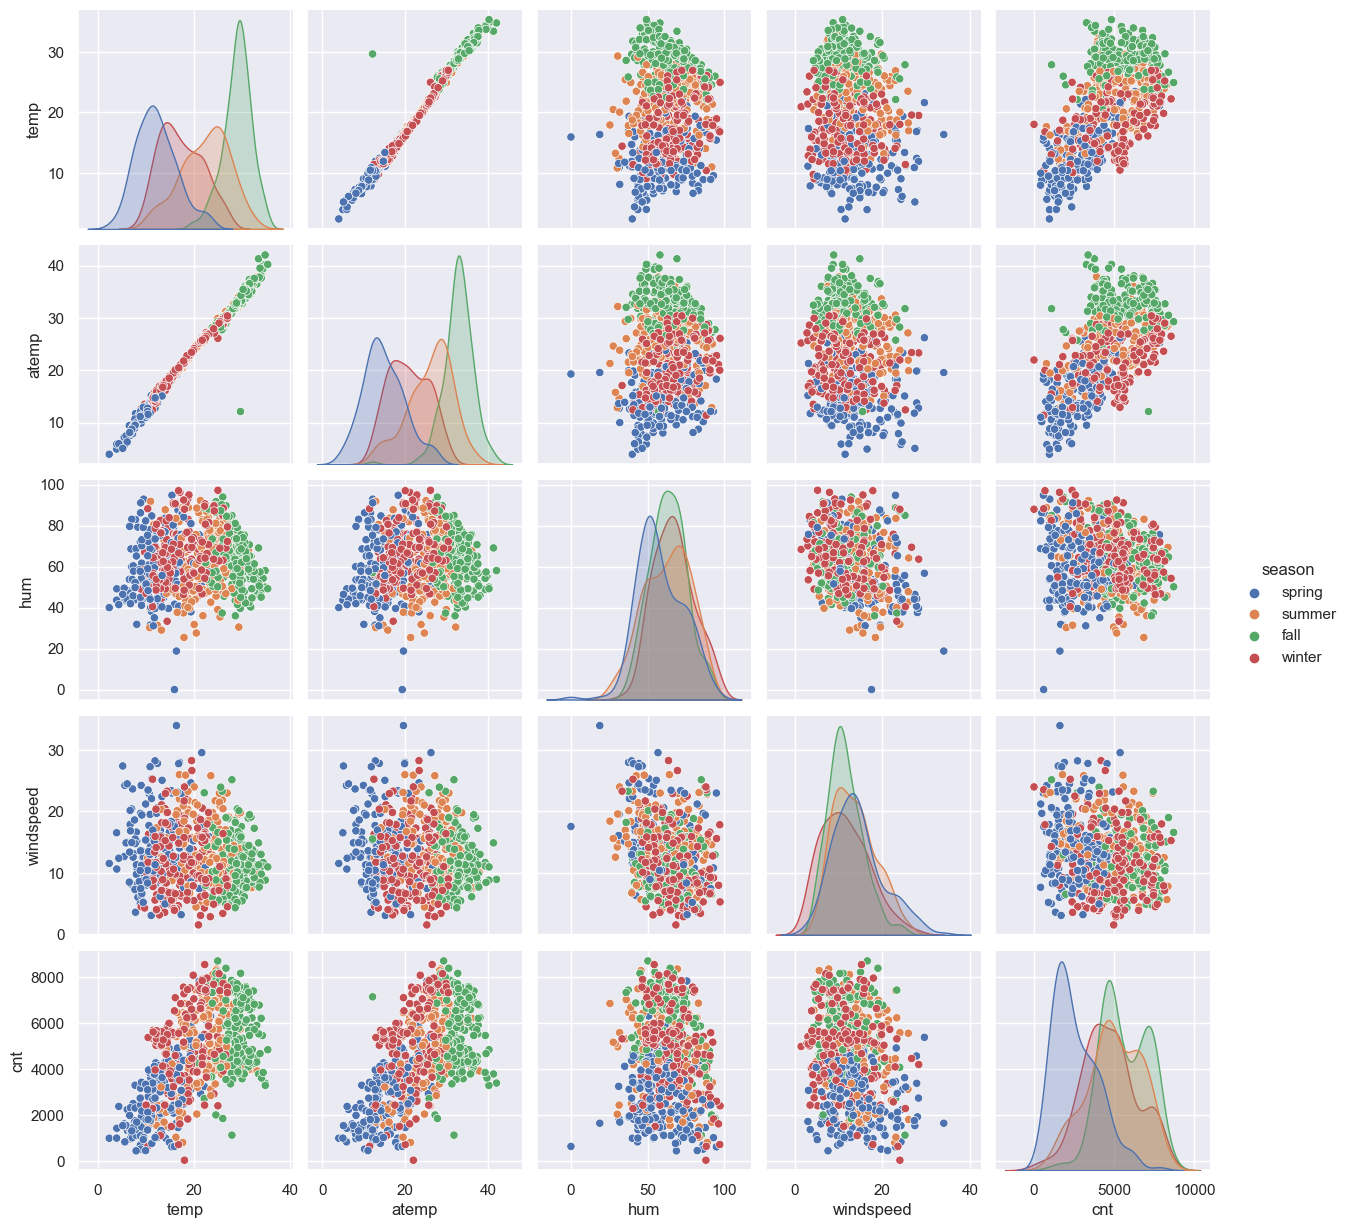

In [1193]:
# Numerical columns with Season Analysis

sns.pairplot(day_df, vars=variables, hue = 'season')

### Insights

It seems higher temp in fall than summer, lesser windspeed in winter and fall could be another reason by people are opting for more bikes.

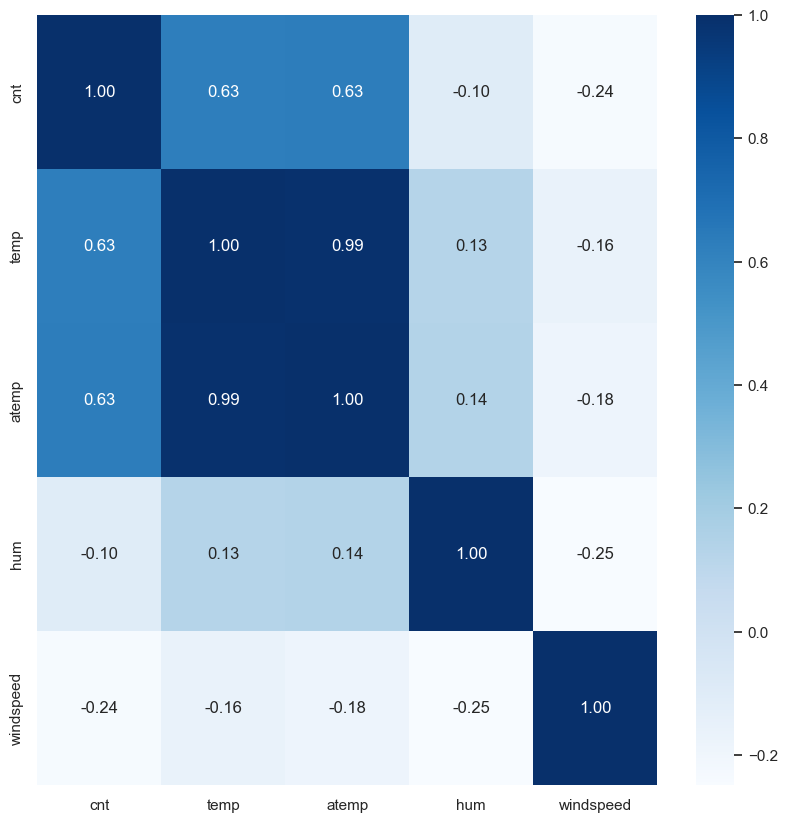

In [1194]:
# Correlation Matrix between numerical features

plt.figure(figsize=(10, 10))  # Set the figure size
heatmap = sns.heatmap(day_df[target_variable +num_cols].corr(), fmt='0.2f', cmap="Blues", annot=True)
plt.show()

### Insights:

Temp and atemp seems to be highly correlated and hence atemp can be dropped from the dataset
Temp has higher positive correlation for target variable which can a significant factor contributing to target.

Humidity and windspeed are negatively related which mens more humidity and windspeed , lesser customers for bike sharing company

### Dropping atemp from the dataset

In [1195]:
day_df.drop(columns=['atemp'], axis=1, inplace=True)

In [1196]:
# Changing yr variable to its original format

day_df['yr'] = day_df['yr'].apply(lambda x: 0 if x == 2018 else 1)
day_df.yr.value_counts()

0    365
1    365
Name: yr, dtype: int64

# Step 3: Data Prepration

In [1197]:
# Categorical Columns drop column to accomodate the level of each categorical columns

day_df = pd.get_dummies(day_df, drop_first=True) 
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   yr                     730 non-null    int64  
 1   holiday                730 non-null    int64  
 2   workingday             730 non-null    int64  
 3   temp                   730 non-null    float64
 4   hum                    730 non-null    float64
 5   windspeed              730 non-null    float64
 6   cnt                    730 non-null    int64  
 7   season_spring          730 non-null    uint8  
 8   season_summer          730 non-null    uint8  
 9   season_winter          730 non-null    uint8  
 10  mnth_Aug               730 non-null    uint8  
 11  mnth_Dec               730 non-null    uint8  
 12  mnth_Feb               730 non-null    uint8  
 13  mnth_Jan               730 non-null    uint8  
 14  mnth_Jul               730 non-null    uint8  
 15  mnth_J

In [1198]:
day_df.shape

(730, 29)

Number of columns increased from 11 to 29

In [1199]:
# Checking Null values again

day_df.isna().sum()

yr                       0
holiday                  0
workingday               0
temp                     0
hum                      0
windspeed                0
cnt                      0
season_spring            0
season_summer            0
season_winter            0
mnth_Aug                 0
mnth_Dec                 0
mnth_Feb                 0
mnth_Jan                 0
mnth_Jul                 0
mnth_Jun                 0
mnth_Mar                 0
mnth_May                 0
mnth_Nov                 0
mnth_Oct                 0
mnth_Sep                 0
weekday_Mon              0
weekday_Sat              0
weekday_Sun              0
weekday_Thu              0
weekday_Tue              0
weekday_Wed              0
weathersit_Cloudy        0
weathersit_Light_Rain    0
dtype: int64

In [1200]:
# Checking Columns

day_df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'season_spring', 'season_summer', 'season_winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'weekday_Mon',
       'weekday_Sat', 'weekday_Sun', 'weekday_Thu', 'weekday_Tue',
       'weekday_Wed', 'weathersit_Cloudy', 'weathersit_Light_Rain'],
      dtype='object')

In [1201]:
# Checking Datatypes after conversion of Categorical Columns

day_df.dtypes

yr                         int64
holiday                    int64
workingday                 int64
temp                     float64
hum                      float64
windspeed                float64
cnt                        int64
season_spring              uint8
season_summer              uint8
season_winter              uint8
mnth_Aug                   uint8
mnth_Dec                   uint8
mnth_Feb                   uint8
mnth_Jan                   uint8
mnth_Jul                   uint8
mnth_Jun                   uint8
mnth_Mar                   uint8
mnth_May                   uint8
mnth_Nov                   uint8
mnth_Oct                   uint8
mnth_Sep                   uint8
weekday_Mon                uint8
weekday_Sat                uint8
weekday_Sun                uint8
weekday_Thu                uint8
weekday_Tue                uint8
weekday_Wed                uint8
weathersit_Cloudy          uint8
weathersit_Light_Rain      uint8
dtype: object

After conversion of categorical columns, new columns got created with datatypes as unint. 
Converting it into int64 to have uniform datatypes 

In [1202]:

cols = ['season_spring', 'season_summer', 'season_winter', 'mnth_Aug', \
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar', \
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'weekday_Mon', \
       'weekday_Sat', 'weekday_Sun', 'weekday_Thu', 'weekday_Tue', \
       'weekday_Wed', 'weathersit_Cloudy', 'weathersit_Light_Rain']

for col in cols:
    day_df[col] = day_df[col].astype('int64')



In [1203]:
day_df.dtypes

yr                         int64
holiday                    int64
workingday                 int64
temp                     float64
hum                      float64
windspeed                float64
cnt                        int64
season_spring              int64
season_summer              int64
season_winter              int64
mnth_Aug                   int64
mnth_Dec                   int64
mnth_Feb                   int64
mnth_Jan                   int64
mnth_Jul                   int64
mnth_Jun                   int64
mnth_Mar                   int64
mnth_May                   int64
mnth_Nov                   int64
mnth_Oct                   int64
mnth_Sep                   int64
weekday_Mon                int64
weekday_Sat                int64
weekday_Sun                int64
weekday_Thu                int64
weekday_Tue                int64
weekday_Wed                int64
weathersit_Cloudy          int64
weathersit_Light_Rain      int64
dtype: object

# Step 4: Splitting the data into train and test

In [1204]:
from sklearn.model_selection import train_test_split

# Specify this so that the train and test data set always have the same rows, respectively

np.random.seed(0)
df_train, df_test = train_test_split(day_df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [1205]:
# Checking shape of train and test dataset

print(f"Train dataset shape {df_train.shape}")
print(f"Test dataset shape {df_test.shape}")

Train dataset shape (510, 29)
Test dataset shape (219, 29)


In [1206]:
df_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'season_spring', 'season_summer', 'season_winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'weekday_Mon',
       'weekday_Sat', 'weekday_Sun', 'weekday_Thu', 'weekday_Tue',
       'weekday_Wed', 'weathersit_Cloudy', 'weathersit_Light_Rain'],
      dtype='object')

In [1207]:
# MinMax Scaler to rescale numerical features only

scaler = MinMaxScaler()


num_cols_new = ['temp',  'hum', 'windspeed'] + target_variable


df_train[num_cols_new] = scaler.fit_transform(df_train[num_cols_new])

In [1208]:
df_train.head()

yr  holiday  workingday     temp      hum  windspeed      cnt  \
653   1        0           1 0.509887 0.575354   0.300794 0.864243   
576   1        0           1 0.815169 0.725633   0.264686 0.827658   
426   1        0           0 0.442393 0.640189   0.255342 0.465255   
728   1        0           0 0.245101 0.498067   0.663106 0.204096   
482   1        0           0 0.395666 0.504508   0.188475 0.482973   

     season_spring  season_summer  season_winter  mnth_Aug  mnth_Dec  \
653              0              0              1         0         0   
576              0              0              0         0         0   
426              1              0              0         0         0   
728              1              0              0         0         1   
482              0              1              0         0         0   

     mnth_Feb  mnth_Jan  mnth_Jul  mnth_Jun  mnth_Mar  mnth_May  mnth_Nov  \
653         0         0         0         0         0         0         0   
576         0         0         1         0         0         0         0   
426         0         0         0         0         1         0         0   
728         0         0         0         0         0         0         0   
482         0         0         0         0         0         0         0   

     mnth_Oct  mnth_Sep  weekday_Mon  weekday_Sat  weekday_Sun  weekday_Thu  \
653         1         0            0            0            0            0   
576         0         0            0            0            0            0   
426         0         0            0            0            1            0   
728         0         0            1            0            0            0   
482         0         0            0            0            1            0   

     weekday_Tue  weekday_Wed  weathersit_Cloudy  weathersit_Light_Rain  
653            0            1                  0                      0  
576            0            1                  0                      0  
426            0            0                  1                      0  
728            0            0                  0                      0  
482            0            0                  1                      0

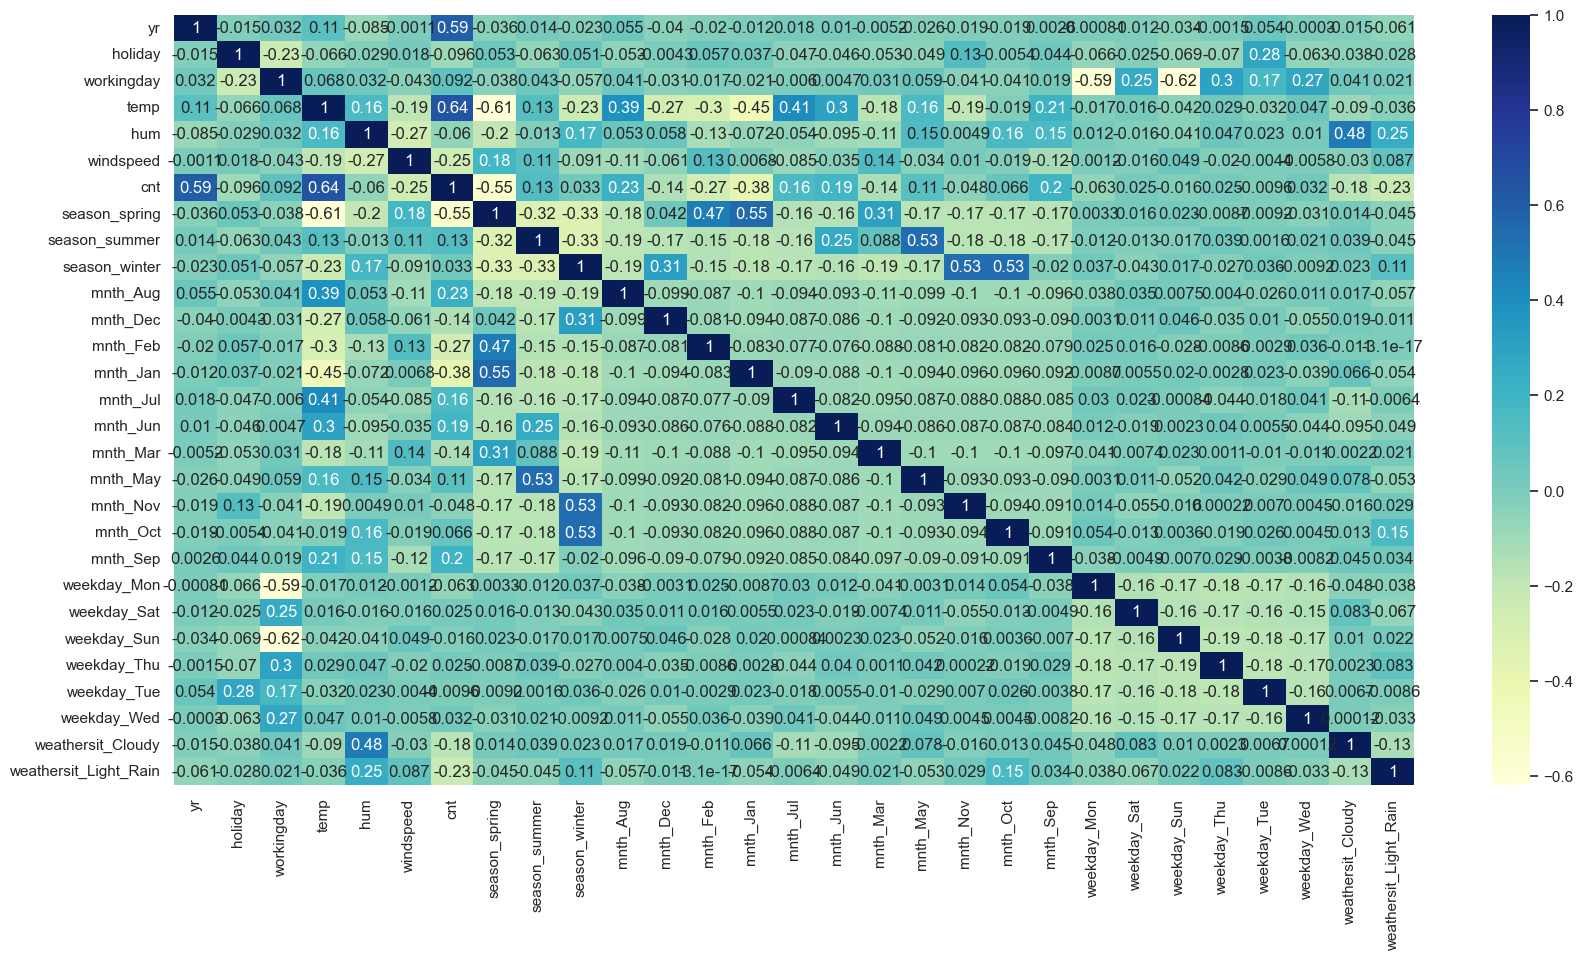

In [1209]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (20, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

### Insights:

yr and temp seems to be highly correlated with target Variable and this should be significant feature for modelling.

season_spring is highly correlated with mnth_Jan and mnth_Feb.
season_winter is highly correlated with mnth_Nov and mnth_Dec.
weekday_sun is highly negatively correlated to WorkingDay. 
Humidity and weathersit_Cloudy are positvely correlated variables.

In [1210]:
# Defining X and Y variables to be used in the model

y_train = df_train.pop('cnt')
X_train = df_train

In [1211]:
# Checking the shape of X_train and y_train

print(X_train.shape)
print(y_train.shape)

(510, 28)
(510,)


In [1212]:
# Checking Nulls. If present then it might cause issue in building model

df_train.isnull().sum()
df1 = df_train[df_train.isna().any(axis=1)]
df1

Empty DataFrame
Columns: [yr, holiday, workingday, temp, hum, windspeed, season_spring, season_summer, season_winter, mnth_Aug, mnth_Dec, mnth_Feb, mnth_Jan, mnth_Jul, mnth_Jun, mnth_Mar, mnth_May, mnth_Nov, mnth_Oct, mnth_Sep, weekday_Mon, weekday_Sat, weekday_Sun, weekday_Thu, weekday_Tue, weekday_Wed, weathersit_Cloudy, weathersit_Light_Rain]
Index: []

In [1213]:
# Running RFE with the output number of the variable equal to 15

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [1214]:
# List of Vairables selected in top 15

rfe_table=pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)),columns=["Feature","support","Rank"])
rfe_table.sort_values(by="Rank",ascending=True)

Feature  support  Rank
0                      yr     True     1
22            weekday_Sun     True     1
20            weekday_Mon     True     1
19               mnth_Sep     True     1
26      weathersit_Cloudy     True     1
8           season_winter     True     1
7           season_summer     True     1
13               mnth_Jul     True     1
5               windspeed     True     1
1                 holiday     True     1
2              workingday     True     1
3                    temp     True     1
6           season_spring     True     1
27  weathersit_Light_Rain     True     1
4                     hum     True     1
12               mnth_Jan    False     2
17               mnth_Nov    False     3
10               mnth_Dec    False     4
11               mnth_Feb    False     5
14               mnth_Jun    False     6
24            weekday_Tue    False     7
25            weekday_Wed    False     8
21            weekday_Sat    False     9
23            weekday_Thu    False    10
18               mnth_Oct    False    11
9                mnth_Aug    False    12
16               mnth_May    False    13
15               mnth_Mar    False    14

Selecting the columns based on RFE selected features

In [1215]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_Jul',
       'mnth_Sep', 'weekday_Mon', 'weekday_Sun', 'weathersit_Cloudy',
       'weathersit_Light_Rain'],
      dtype='object')

Columns not selected in RFE

In [1216]:
X_train.columns[~rfe.support_]

Index(['mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'weekday_Sat', 'weekday_Thu',
       'weekday_Tue', 'weekday_Wed'],
      dtype='object')

## Building model


### Model 1

In [1217]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
 
X_train_lm_1 = sm.add_constant(X_train_rfe)

lm = sm.OLS(y_train,X_train_lm_1).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          1.13e-191
Time:                        21:47:33   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.19

In [1218]:
# Calculate the VIFs for the new model

def calculate_vif(X):
    """Function to calculate and return VIF """

    vif = pd.DataFrame()
    X = X
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

calculate_vif(X_train_rfe)

Features       VIF
2              workingday 50.690000
12            weekday_Sun 12.200000
11            weekday_Mon 11.790000
6           season_spring  5.020000
3                    temp  3.620000
8           season_winter  3.490000
1                 holiday  2.910000
7           season_summer  2.610000
4                     hum  1.910000
13      weathersit_Cloudy  1.570000
9                mnth_Jul  1.490000
10               mnth_Sep  1.300000
14  weathersit_Light_Rain  1.250000
5               windspeed  1.200000
0                      yr  1.030000

workingday has high VIF value hence dropping it

In [1219]:
X_train_new = X_train_rfe.drop(["workingday"], axis = 1)

### Model 2

In [1220]:
X_train_lm_2 = sm.add_constant(X_train_new)

lm_2 = sm.OLS(y_train,X_train_lm_2).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          1.13e-191
Time:                        21:47:33   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.28

In [1221]:
# Calculate the VIFs for the new model
calculate_vif(X_train_new)

Features       VIF
3                     hum 28.280000
2                    temp 16.060000
4               windspeed  4.680000
5           season_spring  4.030000
7           season_winter  3.370000
6           season_summer  2.780000
12      weathersit_Cloudy  2.300000
0                      yr  2.080000
8                mnth_Jul  1.590000
9                mnth_Sep  1.390000
13  weathersit_Light_Rain  1.240000
10            weekday_Mon  1.230000
11            weekday_Sun  1.230000
1                 holiday  1.060000

'hum' has high VIF value and hence dropping it further

In [1222]:
X_train_new = X_train_new.drop(["hum"], axis = 1)

In [1223]:
X_train_new.columns

Index(['yr', 'holiday', 'temp', 'windspeed', 'season_spring', 'season_summer',
       'season_winter', 'mnth_Jul', 'mnth_Sep', 'weekday_Mon', 'weekday_Sun',
       'weathersit_Cloudy', 'weathersit_Light_Rain'],
      dtype='object')

### Model 3

In [1224]:
X_train_lm_3 = sm.add_constant(X_train_new)

lm_3 = sm.OLS(y_train,X_train_lm_3).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.0
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          5.73e-189
Time:                        21:47:33   Log-Likelihood:                 508.65
No. Observations:                 510   AIC:                            -989.3
Df Residuals:                     496   BIC:                            -930.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.20

In [1225]:
# Calculate the VIFs for the new model

calculate_vif(X_train_new)

Features      VIF
2                    temp 5.180000
3               windspeed 4.620000
5           season_summer 2.230000
4           season_spring 2.130000
0                      yr 2.070000
6           season_winter 1.840000
7                mnth_Jul 1.590000
11      weathersit_Cloudy 1.550000
8                mnth_Sep 1.340000
10            weekday_Sun 1.230000
9             weekday_Mon 1.220000
12  weathersit_Light_Rain 1.080000
1                 holiday 1.060000

p-value of mnth_Jul is high and hence dropping it further to see model variables

In [1226]:
X_train_new = X_train_new.drop(["mnth_Jul"], axis = 1)

### Model 4

In [1227]:
X_train_lm_4 = sm.add_constant(X_train_new)

lm_4 = sm.OLS(y_train,X_train_lm_4).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     216.5
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          1.48e-188
Time:                        21:47:33   Log-Likelihood:                 504.87
No. Observations:                 510   AIC:                            -983.7
Df Residuals:                     497   BIC:                            -928.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.19

In [1228]:
# Calculate the VIFs for the new model

calculate_vif(X_train_new)

Features      VIF
3               windspeed 4.620000
2                    temp 3.960000
0                      yr 2.070000
4           season_spring 2.040000
5           season_summer 1.900000
6           season_winter 1.680000
10      weathersit_Cloudy 1.550000
7                mnth_Sep 1.230000
9             weekday_Sun 1.230000
8             weekday_Mon 1.220000
11  weathersit_Light_Rain 1.080000
1                 holiday 1.060000

R- value and adjusted R value decreased slightly however p-value of Weekday_Sun increased, hence dropping this column

In [1229]:
X_train_new = X_train_new.drop(["weekday_Sun"], axis = 1)

### Model 5

In [1230]:
X_train_lm_5 = sm.add_constant(X_train_new)

lm_5 = sm.OLS(y_train,X_train_lm_5).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     236.1
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          1.51e-189
Time:                        21:47:34   Log-Likelihood:                 504.38
No. Observations:                 510   AIC:                            -984.8
Df Residuals:                     498   BIC:                            -933.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.19

In [1231]:
# Calculate the VIFs for the new model

calculate_vif(X_train_new)

Features      VIF
3               windspeed 4.590000
2                    temp 3.910000
0                      yr 2.070000
4           season_spring 2.020000
5           season_summer 1.900000
6           season_winter 1.660000
9       weathersit_Cloudy 1.550000
7                mnth_Sep 1.230000
8             weekday_Mon 1.180000
10  weathersit_Light_Rain 1.080000
1                 holiday 1.050000

VIF values are lesser than 5, however we can still drop windspeed and check influence

In [1232]:
X_train_new = X_train_new.drop(["windspeed"], axis = 1)

### Model 6

In [1233]:
X_train_lm_6 = sm.add_constant(X_train_new)

lm_6 = sm.OLS(y_train,X_train_lm_6).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     239.6
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          2.50e-183
Time:                        21:47:34   Log-Likelihood:                 486.82
No. Observations:                 510   AIC:                            -951.6
Df Residuals:                     499   BIC:                            -905.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.14

In [1234]:
# Calculate the VIFs for the new model

calculate_vif(X_train_new)

Features      VIF
2                   temp 2.970000
0                     yr 2.060000
4          season_summer 1.630000
8      weathersit_Cloudy 1.550000
5          season_winter 1.460000
3          season_spring 1.350000
6               mnth_Sep 1.230000
7            weekday_Mon 1.180000
9  weathersit_Light_Rain 1.070000
1                holiday 1.050000

We can consider above model as the p-values are low which states all the variables are significant. 

VIF values for all the variables are lesser which states that no multi-collinearity exists. 

Also, F-statistic and prob (F-statistic) are 293.6 and 2.50e-183 respectively which states that overall its a good fit model.

# Step 5: Residual Analysis of the train data

In [1235]:
# Add a constant column to the DataFrame 'x_train_rfe' using statsmodels
x_train_sm = sm.add_constant(X_train_new)

# Predict the target variable 'y_train' using the trained regression model 'lm' and the DataFrame 'x_train_sm'
y_train_pred = lm_6.predict(x_train_sm)

Text(0.5, 0, 'Errors')

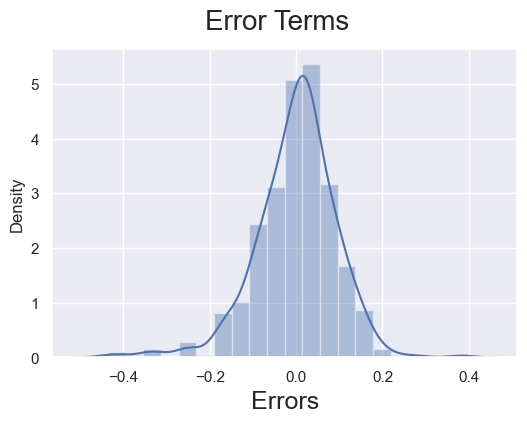

In [1236]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)

In [1237]:
mean_residuals = np.mean((y_train - y_train_pred))
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals -1.7763568394002505e-15


### Insights :

One of the assumption of Linear Regression is mean of residuals should be zero. 
From the above graph , errors are normally distributed and mean of errors are very close to 0 which statisfies the assumption

In [1238]:
def calculate_residuals(model=lm, X=x_train_sm, label=y_train):
    """
    Creates predictions on the features with the model and calculates residuals
    """
    predictions = model.predict(x_train_sm)
    df_results = pd.DataFrame({'Actual': label, 'Predicted': predictions})
    df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])
    
    return df_results

In [1239]:
X_train_lm_6.shape
y_train.shape

(510,)

### Check for Homoscedasticity

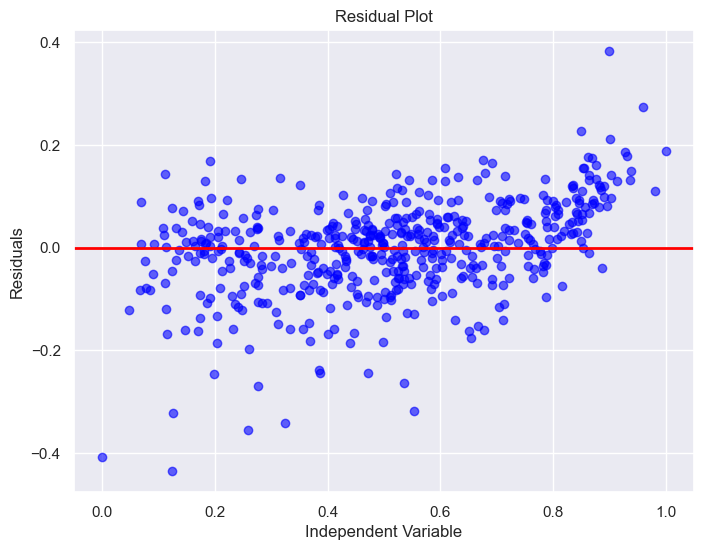

In [1240]:
# Calculate residuals
residuals = y_train - y_train_pred
#y_train,X_train_lm
# Create a residual plot
plt.figure(figsize=(8, 6))
plt.scatter(y_train, residuals, c='blue', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='solid', linewidth=2)
plt.title('Residual Plot')
plt.xlabel('Independent Variable')
plt.ylabel('Residuals')
plt.show()

### Insights:

There is no definite pattern obtained from scatter plot so we can safely say that it is Unbaised and Homoscedastic.

In [1241]:
def autocorrelation_assumption(model, features, label):   
    
    print('Testing Assumption: No Autocorrelation', '\n')
    
    # Calculating residuals for the Durbin Watson-tests
    df_results = calculate_residuals(model, features, label)

    print('\nPerforming Durbin-Watson Test')
    
    print('-------------------------------------')
    durbinWatson = durbin_watson(df_results['Residuals'])
    print('Durbin-Watson:', durbinWatson)
    if durbinWatson < 1.5:
        print('Signs of positive autocorrelation', '\n')
        print('Assumption not satisfied')
    elif durbinWatson > 2.5:
        print('Signs of negative autocorrelation', '\n')
        print('Assumption not satisfied')
    else:
        print('Little to no autocorrelation', '\n')
        print('Assumption satisfied')

autocorrelation_assumption(lm_6, x_train_sm, y_train)     

Testing Assumption: No Autocorrelation 


Performing Durbin-Watson Test
-------------------------------------
Durbin-Watson: 2.07351951930541
Little to no autocorrelation 

Assumption satisfied


Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data
Values Between 0 to 2< is positive autocorrelation and values between >2 to 4 is negative autocorrelation.

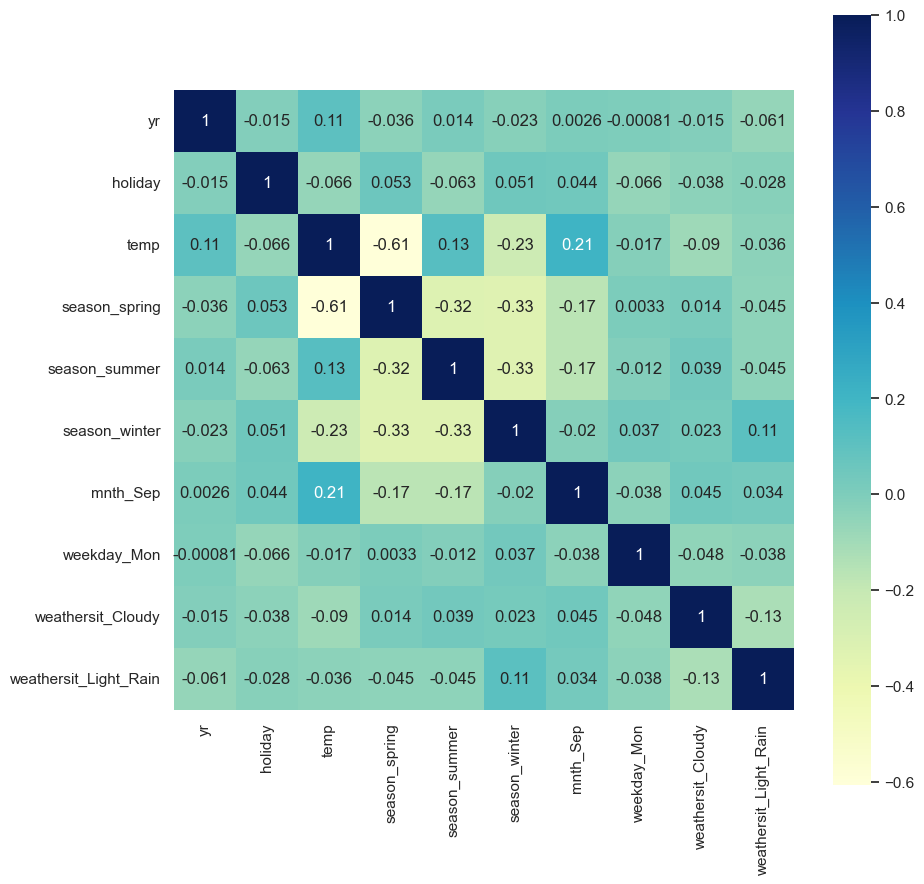

In [1258]:
# To check no perfect collinearity

plt.figure(figsize=(10,10))  
p=sns.heatmap(X_train_new.corr(), annot=True,cmap='YlGnBu',square=True) 

### Insights

No perfect multi-collinearity exists between variables and hence satisfies the assumption of No perfect multi-Collinearity

# Step 6 : Making Prediction Using Final Model

In [1242]:
# Rescaling Numerical Features for test dataset

scaler = MinMaxScaler()

num_cols_new = ['temp',  'hum', 'windspeed'] + target_variable


df_test[num_cols_new] = scaler.fit_transform(df_test[num_cols_new])

In [1243]:
# Check first few rows

df_test.head()

yr  holiday  workingday     temp      hum  windspeed      cnt  \
184   0        1           0 0.837241 0.534223   0.149393 0.704300   
535   1        0           1 0.911423 0.470417   0.231142 0.725421   
299   0        0           1 0.496221 0.777843   0.443398 0.278853   
221   0        0           1 0.890387 0.236659   0.449707 0.545512   
152   0        0           1 0.821739 0.070765   0.682387 0.569148   

     season_spring  season_summer  season_winter  mnth_Aug  mnth_Dec  \
184              0              0              0         0         0   
535              0              1              0         0         0   
299              0              0              1         0         0   
221              0              0              0         1         0   
152              0              1              0         0         0   

     mnth_Feb  mnth_Jan  mnth_Jul  mnth_Jun  mnth_Mar  mnth_May  mnth_Nov  \
184         0         0         1         0         0         0         0   
535         0         0         0         1         0         0         0   
299         0         0         0         0         0         0         0   
221         0         0         0         0         0         0         0   
152         0         0         0         1         0         0         0   

     mnth_Oct  mnth_Sep  weekday_Mon  weekday_Sat  weekday_Sun  weekday_Thu  \
184         0         0            0            0            0            0   
535         0         0            0            0            0            1   
299         1         0            0            0            0            0   
221         0         0            0            0            0            1   
152         0         0            0            0            0            0   

     weekday_Tue  weekday_Wed  weathersit_Cloudy  weathersit_Light_Rain  
184            1            0                  1                      0  
535            0            0                  0                      0  
299            0            0                  1                      0  
221            0            0                  0                      0  
152            0            0                  0                      0

In [1244]:
# Generating descriptive Statistics 

df_test.describe()

yr    holiday  workingday       temp        hum  windspeed  \
count 219.000000 219.000000  219.000000 219.000000 219.000000 219.000000   
mean    0.479452   0.036530    0.698630   0.546312   0.508750   0.418870   
std     0.500722   0.188034    0.459904   0.249189   0.201253   0.188111   
min     0.000000   0.000000    0.000000   0.000000   0.000000   0.000000   
25%     0.000000   0.000000    0.000000   0.328479   0.358469   0.283817   
50%     0.000000   0.000000    1.000000   0.546045   0.494200   0.402533   
75%     1.000000   0.000000    1.000000   0.759735   0.651165   0.524362   
max     1.000000   1.000000    1.000000   1.000000   1.000000   1.000000   

             cnt  season_spring  season_summer  season_winter   mnth_Aug  \
count 219.000000     219.000000     219.000000     219.000000 219.000000   
mean    0.516216       0.255708       0.264840       0.232877   0.059361   
std     0.238702       0.437258       0.442259       0.423633   0.236840   
min     0.000000       0.000000       0.000000       0.000000   0.000000   
25%     0.359882       0.000000       0.000000       0.000000   0.000000   
50%     0.520241       0.000000       0.000000       0.000000   0.000000   
75%     0.682487       1.000000       1.000000       0.000000   0.000000   
max     1.000000       1.000000       1.000000       1.000000   1.000000   

        mnth_Dec   mnth_Feb   mnth_Jan   mnth_Jul   mnth_Jun   mnth_Mar  \
count 219.000000 219.000000 219.000000 219.000000 219.000000 219.000000   
mean    0.086758   0.100457   0.077626   0.105023   0.095890   0.054795   
std     0.282125   0.301297   0.268194   0.307285   0.295115   0.228100   
min     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
25%     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
50%     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
75%     0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
max     1.000000   1.000000   1.000000   1.000000   1.000000   1.000000   

        mnth_May   mnth_Nov   mnth_Oct   mnth_Sep  weekday_Mon  weekday_Sat  \
count 219.000000 219.000000 219.000000 219.000000   219.000000   219.000000   
mean    0.086758   0.073059   0.082192   0.086758     0.146119     0.178082   
std     0.282125   0.260830   0.275286   0.282125     0.354034     0.383458   
min     0.000000   0.000000   0.000000   0.000000     0.000000     0.000000   
25%     0.000000   0.000000   0.000000   0.000000     0.000000     0.000000   
50%     0.000000   0.000000   0.000000   0.000000     0.000000     0.000000   
75%     0.000000   0.000000   0.000000   0.000000     0.000000     0.000000   
max     1.000000   1.000000   1.000000   1.000000     1.000000     1.000000   

       weekday_Sun  weekday_Thu  weekday_Tue  weekday_Wed  weathersit_Cloudy  \
count   219.000000   219.000000   219.000000   219.000000         219.000000   
mean      0.118721     0.100457     0.127854     0.164384           0.319635   
std       0.324202     0.301297     0.334692     0.371472           0.467403   
min       0.000000     0.000000     0.000000     0.000000           0.000000   
25%       0.000000     0.000000     0.000000     0.000000           0.000000   
50%       0.000000     0.000000     0.000000     0.000000           0.000000   
75%       0.000000     0.000000     0.000000     0.000000           1.000000   
max       1.000000     1.000000     1.000000     1.000000           1.000000   

       weathersit_Light_Rain  
count             219.000000  
mean                0.027397  
std                 0.163612  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                 0.000000  
max                 1.000000

In [1245]:
y_test = df_test.pop('cnt')
X_test = df_test

In [1246]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [1247]:
# Making predictions
y_pred = lm_6.predict(X_test_new)

# Step 7 : Model Evaluation

Text(0, 0.5, 'y_pred')

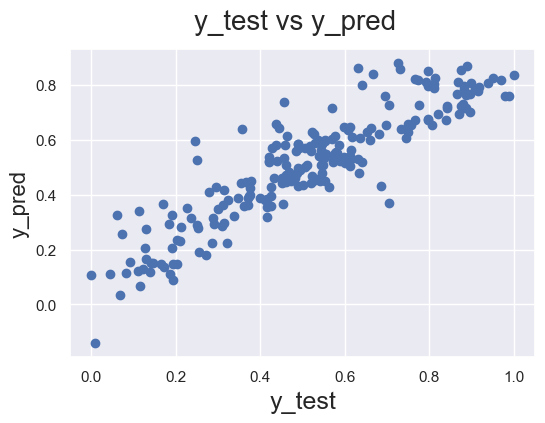

In [1248]:
# Plotting y_test and y_pred to understand the spread.

fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [1249]:
# Calculating Adjusted-R^2 value for the test dataset

r2_train = lm_6.rsquared_adj
print(f"R2 score for train data {lm_6.rsquared_adj}")

adjusted_r2_train = round(1-(1-r2_train)*(X_train_new.shape[0]-1)/(X_train_new.shape[0]-X_train_new.shape[1]-1),4)
print(f" Adjusted R2 score for train data {adjusted_r2_train}")

r2_test = r2_score(y_test, y_pred)
print(f" R2 score for test dataset {r2_test}")

adjusted_r2 = round(1-(1-r2_test)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(f" Adjusted R2 score for test data {adjusted_r2}")

R2 score for train data 0.8241713739243506
 Adjusted R2 score for train data 0.8206
 R2 score for test dataset 0.8079450328741256
 Adjusted R2 score for test data 0.7796


In [1253]:
lm_6.params

const                    0.148817
yr                       0.232943
holiday                 -0.107633
temp                     0.490428
season_spring           -0.063447
season_summer            0.051477
season_winter            0.099464
mnth_Sep                 0.093712
weekday_Mon             -0.049677
weathersit_Cloudy       -0.080495
weathersit_Light_Rain   -0.306094
dtype: float64

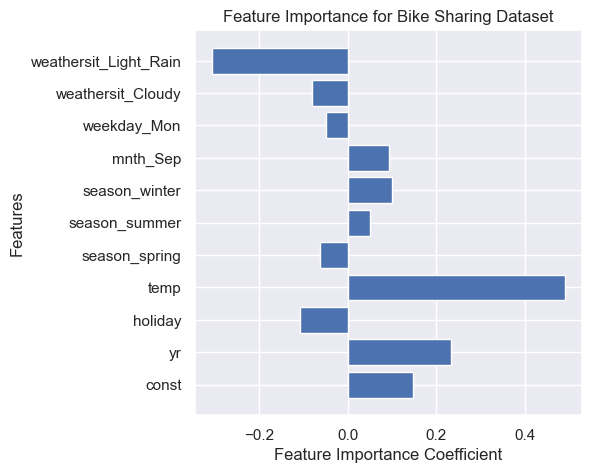

In [1252]:
# plot the feature importance of Linear Regression Model

plt.figure(figsize=(5, 5))
plt.barh(X_test_new.columns, lm_6.params)
plt.xlabel("Feature Importance Coefficient")
plt.ylabel("Features")
plt.title("Feature Importance for Bike Sharing Dataset")
plt.show()

Insight:

From the above feature coefficient below is the equation for the best - fit line:

$ cnt = 0.148817 + 0.232943 \times yr -0.107633 \times holiday  + 0.490428 \times temp -0.063447 \times season_spring + 0.051477 \times season_summer + 0.099464 \times season_winter + 0.093712 \times mnth_Sep - 0.049677 \times weekday_Mon -0.080495 \times weathersit_Cloudy -0.306094 \times weathersit_Light_Rain $


Finally the model states that temp is a very significant factor for bike sharing company with 0.49 as coefficient Value.
Another significant feature is year with 0.23 coefficient value.
Rainy weather is another feature which company should consider. During Rainy Weather people are less likely to rent/use bikes.

These observations are also inferred from EDA done in above sections.
